In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
# Load Iris dataset
data = datasets.load_iris()
df = pd.DataFrame(data['data']).set_axis(data['feature_names'], axis=1)
df['target'] = data['target']

In [3]:
# Only keep data of target 0 & 1 for binary classification 
df = df[df.target.isin([0,1])]
print(f"Target 0: {data['target_names'][0]}")
print(f"Target 1: {data['target_names'][1]}")

Target 0: setosa
Target 1: versicolor


Since this notebook is focus at implementing the algorithm, train-test-split is deliberately ommitted. There is just X and y, and no X_train, y_train, etc.

In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Algorithm building

To build the Logistic Regression algorithm, there are 3 key building blocks:
1. Sigmoid Function
2. Cost (Loss) Function
3. Gradient Descent Algorithm

#### Sigmoid function

The Sigmoid function squashes the values to between 0 and 1. It produces a signature S-shaped curve.

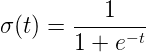

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

#### Cost function

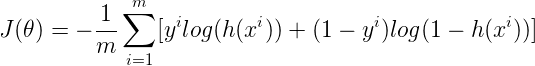

While the formula looks intimidating at first glance, it can be decomposed into 2 parts for simpler understanding.

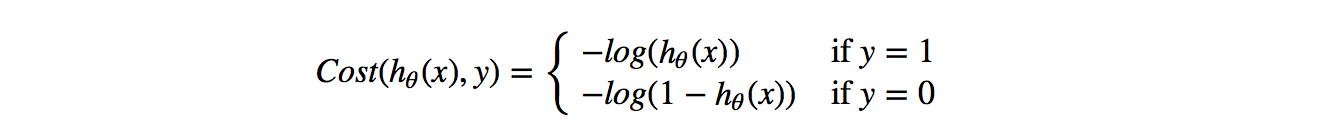

*y * log(h)*  --  this part calculates the loss for when actual y = 1
* if the predicted h from the sigmoid function is 1, the cost/loss is 0;
* otherwise, if the predicted h is 0 (or close to 0), log(h) becomes greater and increases the loss

*(1-y) * log(1-h)*  --  this part calculates the loss for when actual y = 0
* if the predicted h is 1 (or close to 1), loss is non-zero, i.e. (1-0) * log(0) 
* otherwise, if the predicted h is 0, (1-0) * log(1-0) = 0

In [6]:
def loss(X, y, theta):
    m = len(y) 
    z = np.dot(X, theta) 
    h = sigmoid(z) 
    # since log(0) = infinity, adding arbitrary small value to h will prevent the cost from blowing up, although h is rarely exactly 0
    # epsilon = 0.00001 
    cost = (((-y) * np.log(h))-((1-y) * np.log(1-h)))/m # taking log of <1 will return negative values, hence multiply -1
    return cost

#### Gradient descent algorithm

Taking the derivative of the loss function with respect to each weight will tell us how the loss would change with different parameters, i.e. weights, thereby allowing us to update the weights. The weights are updated by subtracting the learning rate * gradient.

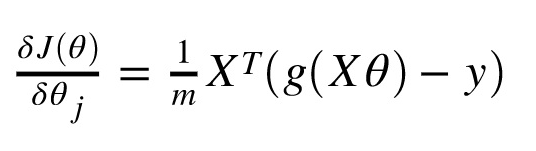

In [7]:
def gradient(X, y, theta):
    h = sigmoid(np.dot(X, theta))
    gradient = np.dot(X.T,(h-y))/m 
    return gradient # return a vector

## Putting everything together in fit() & predict()

In [8]:
def fit(X, y, learning_rate, epochs):
    
    # Initialize theta with random values / zeros
    theta = np.random.rand(X.shape[1])
    m = len(X)
    loss = [] # To store the loss per epoch

    # Iteratively update theta through gradient descent
    for epoch in range(epochs):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T,(h-y))/m 
        theta -= learning_rate * gradient
        cost = (((-y) * np.log(h))-((1-y) * np.log(1-h))).mean()
        loss.append(cost)
        
    # Return optimal theta (coefficients) which will be passed as a parameter to predict() & the losses
    return theta, loss

In [9]:
theta, loss = fit(X,y,0.01,1000)

In [10]:
# The optimal weights for X1 to X4
theta

array([-0.27036532, -1.19499068,  1.74926901,  0.42560854])

In [11]:
print(f'z = X1 * {theta[0]:.2f} + X2 * {theta[1]:.2f} + X3 * {theta[2]:.2f} + X4 * {theta[3]:.2f}')
print('The calculated z will be passed to the sigmoid function and yields anywhere between 0 and 1.')

z = X1 * -0.27 + X2 * -1.19 + X3 * 1.75 + X4 * 0.43
The calculated z will be passed to the sigmoid function and yields anywhere between 0 and 1.


<AxesSubplot:>

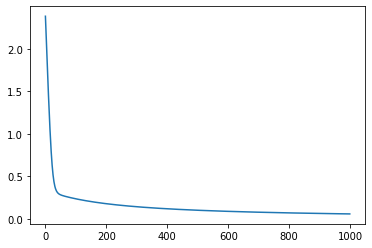

In [12]:
# Plot the loss
import seaborn as sns
sns.lineplot(x=range(len(loss)), y=loss)

In [13]:
def predict(X, theta, threshold):
    z = np.dot(X, theta)
    h = sigmoid(z)
    return np.where(h > 0.5, 1, 0)

In [14]:
# Sample from the dataset for testing the model
sample = df.sample(5)
sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
64,5.6,2.9,3.6,1.3,1
75,6.6,3.0,4.4,1.4,1
36,5.5,3.5,1.3,0.2,0
66,5.6,3.0,4.5,1.5,1
54,6.5,2.8,4.6,1.5,1


In [15]:
# Make prediction
test_X = df.iloc[sample.index,:-1].values
predict(test_X, theta, 0.5)

array([1, 1, 0, 1, 1])